In [ ]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

In [ ]:
data = arff.loadarff('KC1.arff')
df = pd.DataFrame(data[0])
df.head()

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,...,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,Defective
0,9.0,11.0,0.0,0.0,6.0,5.0,5.0,29.0,26.93,18.90,...,95.0,0.05,534.42,508.97,36.0,59.0,20.0,21.0,41.0,b'Y'
1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0,16.73,3.00,...,14.0,0.33,8.36,50.19,6.0,8.0,6.0,6.0,7.0,b'N'
2,18.0,31.0,0.0,27.0,16.0,13.0,12.0,137.0,86.96,33.60,...,437.0,0.03,5454.40,2922.00,180.0,257.0,75.0,28.0,184.0,b'Y'
3,1.0,5.0,0.0,1.0,3.0,2.0,1.0,18.0,22.33,14.18,...,70.0,0.07,249.48,316.65,26.0,44.0,11.0,12.0,23.0,b'Y'
4,5.0,17.0,0.0,7.0,9.0,8.0,1.0,82.0,69.72,22.29,...,274.0,0.04,1924.82,1554.24,107.0,167.0,36.0,15.0,96.0,b'Y'


In [ ]:
# Untuk melihat deskripsi singkat data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOC_BLANK              1183 non-null   float64
 1   BRANCH_COUNT           1183 non-null   float64
 2   LOC_CODE_AND_COMMENT   1183 non-null   float64
 3   LOC_COMMENTS           1183 non-null   float64
 4   CYCLOMATIC_COMPLEXITY  1183 non-null   float64
 5   DESIGN_COMPLEXITY      1183 non-null   float64
 6   ESSENTIAL_COMPLEXITY   1183 non-null   float64
 7   LOC_EXECUTABLE         1183 non-null   float64
 8   HALSTEAD_CONTENT       1183 non-null   float64
 9   HALSTEAD_DIFFICULTY    1183 non-null   float64
 10  HALSTEAD_EFFORT        1183 non-null   float64
 11  HALSTEAD_ERROR_EST     1183 non-null   float64
 12  HALSTEAD_LENGTH        1183 non-null   float64
 13  HALSTEAD_LEVEL         1183 non-null   float64
 14  HALSTEAD_PROG_TIME     1183 non-null   float64
 15  HALS

In [ ]:
df.describe()

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,...,HALSTEAD_ERROR_EST,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL
count,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,...,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000
mean,2.944210,7.165680,0.203719,1.623838,4.091293,3.597633,2.154691,23.906171,31.158563,10.258969,...,0.144252,81.076923,0.199611,506.369941,432.761133,30.794590,50.282333,14.918850,10.501268,31.950972
std,4.721904,9.534669,0.903042,3.970237,4.771792,4.137288,2.802690,28.562998,23.314468,8.787196,...,0.210707,99.961431,0.261933,1249.566331,632.176312,38.358549,61.964496,13.720876,5.767180,34.974092
min,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,6.000000,14.720000,3.750000,...,0.020000,18.000000,0.070000,13.175000,62.910000,7.000000,11.000000,5.000000,6.000000,10.000000
50%,1.000000,3.000000,0.000000,0.000000,2.000000,2.000000,1.000000,14.000000,25.660000,7.710000,...,0.060000,43.000000,0.120000,86.440000,191.760000,17.000000,27.000000,11.000000,10.000000,20.000000
75%,3.000000,9.000000,0.000000,2.000000,5.000000,4.000000,1.000000,33.000000,42.580000,14.360000,...,0.180000,106.500000,0.230000,411.680000,544.510000,40.000000,66.000000,21.000000,14.000000,41.000000
max,58.000000,89.000000,12.000000,44.000000,45.000000,45.000000,26.000000,262.000000,193.060000,53.750000,...,2.640000,1106.000000,2.000000,18044.640000,7918.820000,428.000000,678.000000,120.000000,37.000000,288.000000


In [ ]:
df.isna().sum().sort_values(ascending = False)

LOC_BLANK                0
BRANCH_COUNT             0
LOC_TOTAL                0
NUM_UNIQUE_OPERATORS     0
NUM_UNIQUE_OPERANDS      0
NUM_OPERATORS            0
NUM_OPERANDS             0
HALSTEAD_VOLUME          0
HALSTEAD_PROG_TIME       0
HALSTEAD_LEVEL           0
HALSTEAD_LENGTH          0
HALSTEAD_ERROR_EST       0
HALSTEAD_EFFORT          0
HALSTEAD_DIFFICULTY      0
HALSTEAD_CONTENT         0
LOC_EXECUTABLE           0
ESSENTIAL_COMPLEXITY     0
DESIGN_COMPLEXITY        0
CYCLOMATIC_COMPLEXITY    0
LOC_COMMENTS             0
LOC_CODE_AND_COMMENT     0
Defective                0
dtype: int64

DATA PREPROCESSING


### TRANSFORMASI DATASET

In [ ]:
ind_col = [col for col in df.columns if col != 'Defective']
dep_col = 'Defective'

In [ ]:
df[dep_col].value_counts()

Defective
b'N'    869
b'Y'    314
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
# label encoding > special handling for class
label_encoder = LabelEncoder() # Create an instance of LabelEncoder

# Fit and transform the 'label' column
df['Defective'] = label_encoder.fit_transform(df['Defective'])

# show
df.head()

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,...,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,Defective
0,9.0,11.0,0.0,0.0,6.0,5.0,5.0,29.0,26.93,18.90,...,95.0,0.05,534.42,508.97,36.0,59.0,20.0,21.0,41.0,1
1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0,16.73,3.00,...,14.0,0.33,8.36,50.19,6.0,8.0,6.0,6.0,7.0,0
2,18.0,31.0,0.0,27.0,16.0,13.0,12.0,137.0,86.96,33.60,...,437.0,0.03,5454.40,2922.00,180.0,257.0,75.0,28.0,184.0,1
3,1.0,5.0,0.0,1.0,3.0,2.0,1.0,18.0,22.33,14.18,...,70.0,0.07,249.48,316.65,26.0,44.0,11.0,12.0,23.0,1
4,5.0,17.0,0.0,7.0,9.0,8.0,1.0,82.0,69.72,22.29,...,274.0,0.04,1924.82,1554.24,107.0,167.0,36.0,15.0,96.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOC_BLANK              1183 non-null   float64
 1   BRANCH_COUNT           1183 non-null   float64
 2   LOC_CODE_AND_COMMENT   1183 non-null   float64
 3   LOC_COMMENTS           1183 non-null   float64
 4   CYCLOMATIC_COMPLEXITY  1183 non-null   float64
 5   DESIGN_COMPLEXITY      1183 non-null   float64
 6   ESSENTIAL_COMPLEXITY   1183 non-null   float64
 7   LOC_EXECUTABLE         1183 non-null   float64
 8   HALSTEAD_CONTENT       1183 non-null   float64
 9   HALSTEAD_DIFFICULTY    1183 non-null   float64
 10  HALSTEAD_EFFORT        1183 non-null   float64
 11  HALSTEAD_ERROR_EST     1183 non-null   float64
 12  HALSTEAD_LENGTH        1183 non-null   float64
 13  HALSTEAD_LEVEL         1183 non-null   float64
 14  HALSTEAD_PROG_TIME     1183 non-null   float64
 15  HALS

In [ ]:
# Pre-processing dataset yang digunakan
# Normalisasi min max -> pembagian data dengan yang data terbesar
scaler = MinMaxScaler()
# axis = 1 -> mempresentasifkan label di kolom
# axis = 0 -> mempresentasifkan label di row
# Untuk menormalisasikan data menggunakan min max
scaled_data = scaler.fit_transform(df.drop('Defective', axis = 1))
# Untuk menambahka kolom pada data
preprocessed_data = pd.DataFrame(scaled_data, columns = df.columns[:-1])
# Untuk menambahkan kolom defect
print(df)

      LOC_BLANK  BRANCH_COUNT  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0           9.0          11.0                   0.0           0.0   
1           0.0           1.0                   0.0           0.0   
2          18.0          31.0                   0.0          27.0   
3           1.0           5.0                   0.0           1.0   
4           5.0          17.0                   0.0           7.0   
...         ...           ...                   ...           ...   
1178        0.0           1.0                   0.0           0.0   
1179        2.0          13.0                   0.0           0.0   
1180       11.0          29.0                   0.0           2.0   
1181        0.0           1.0                   0.0           0.0   
1182        2.0           5.0                   0.0           0.0   

      CYCLOMATIC_COMPLEXITY  DESIGN_COMPLEXITY  ESSENTIAL_COMPLEXITY  \
0                       6.0                5.0                   5.0   
1                       1.0

In [ ]:
# Standar machine learning / penamaan variable
# X -> 20 fitur yang telah di normalisasi
X = preprocessed_data
# Y -> label yang akan diprediksi atau kolom defects
Y = df['Defective']
print(X)
# X.info()

      LOC_BLANK  BRANCH_COUNT  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0      0.155172      0.113636                   0.0      0.000000   
1      0.000000      0.000000                   0.0      0.000000   
2      0.310345      0.340909                   0.0      0.613636   
3      0.017241      0.045455                   0.0      0.022727   
4      0.086207      0.181818                   0.0      0.159091   
...         ...           ...                   ...           ...   
1178   0.000000      0.000000                   0.0      0.000000   
1179   0.034483      0.136364                   0.0      0.000000   
1180   0.189655      0.318182                   0.0      0.045455   
1181   0.000000      0.000000                   0.0      0.000000   
1182   0.034483      0.045455                   0.0      0.000000   

      CYCLOMATIC_COMPLEXITY  DESIGN_COMPLEXITY  ESSENTIAL_COMPLEXITY  \
0                  0.113636           0.090909                  0.16   
1                  0.000000

### SMOTE

<Axes: xlabel='Defective', ylabel='count'>

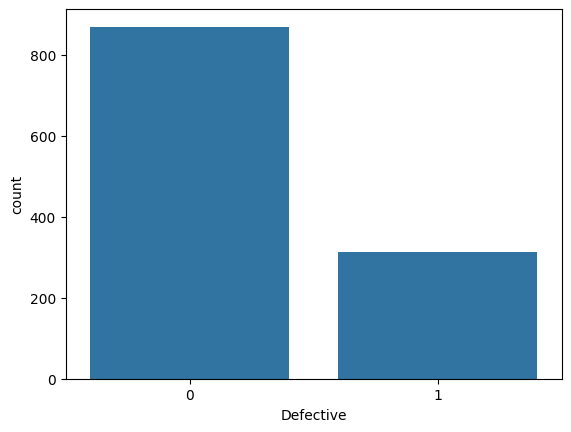

In [ ]:
# Get the value counts
sns.countplot(df, x="Defective")

In [ ]:
# Penyeimbangan class dengan menggunakan SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X, Y = smote.fit_resample(X, Y)

Defective
0            869
1            869
Name: count, dtype: int64



Text(0.5, 1.0, 'Train Class')

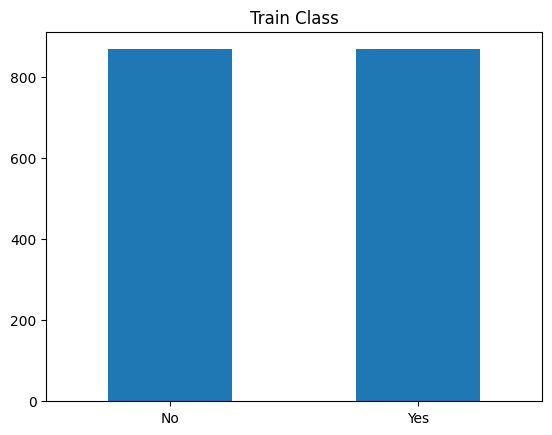

In [ ]:
# imbalanced class
df_Y = pd.DataFrame(Y)
print(f'{df_Y.value_counts()}\n')

df_Y.value_counts().plot(kind='bar')
plt.xticks([0, 1],['No','Yes'], rotation=0)
plt.xlabel('')
plt.title('Train Class')

In [ ]:
# Penyeimbangan class dengan menggunakan SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_resampled, Y_resampled = smote.fit_resample(X, Y)
print(X_resampled)

      LOC_BLANK  BRANCH_COUNT  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0      0.155172      0.113636              0.000000      0.000000   
1      0.000000      0.000000              0.000000      0.000000   
2      0.310345      0.340909              0.000000      0.613636   
3      0.017241      0.045455              0.000000      0.022727   
4      0.086207      0.181818              0.000000      0.159091   
...         ...           ...                   ...           ...   
1733   0.295227      0.276713              0.000000      0.541469   
1734   0.291848      0.455373              0.019316      0.088275   
1735   0.000000      0.000000              0.000000      0.000000   
1736   0.155172      0.157798              0.000000      0.068182   
1737   0.017241      0.067738              0.000000      0.000000   

      CYCLOMATIC_COMPLEXITY  DESIGN_COMPLEXITY  ESSENTIAL_COMPLEXITY  \
0                  0.113636           0.090909              0.160000   
1                  0.000000

### SPLITTING DATA

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

print("\n shape of train split: ")
print(X_train.shape, Y_train.shape)
print("\n shape of test split: ")
print(X_test.shape, Y_test.shape)


 shape of train split: 
(1390, 21) (1390,)

 shape of test split: 
(348, 21) (348,)


### FEATURE SELECTION

In [ ]:
num_ants = 10
evaporation_rate = 0.5
alpha = 1.0
beta = 2.0
num_iterations = 10
best_features = None
num_best_features = 10
best_accuracy = 0.0

In [ ]:
num_features = X_train.shape[1]
pheromone_levels = np.ones(num_features)

In [ ]:
def feature_slection(alpha, pheromone_levels):
  features_selected = []
  remaining_features = set(range(len(pheromone_levels)))

  while remaining_features:
      probabilities = pheromone_levels[list(remaining_features)] **alpha
      probabilities /= probabilities.sum()

      selected_feature = np.random.choice(list(remaining_features), p=probabilities)
      features_selected.append(selected_feature)
      remaining_features.remove(selected_feature)

  return features_selected

In [ ]:
column_names = df.columns.tolist()

# Remove the last element (class)
column_names = column_names[:-1]
column_names

['LOC_BLANK',
 'BRANCH_COUNT',
 'LOC_CODE_AND_COMMENT',
 'LOC_COMMENTS',
 'CYCLOMATIC_COMPLEXITY',
 'DESIGN_COMPLEXITY',
 'ESSENTIAL_COMPLEXITY',
 'LOC_EXECUTABLE',
 'HALSTEAD_CONTENT',
 'HALSTEAD_DIFFICULTY',
 'HALSTEAD_EFFORT',
 'HALSTEAD_ERROR_EST',
 'HALSTEAD_LENGTH',
 'HALSTEAD_LEVEL',
 'HALSTEAD_PROG_TIME',
 'HALSTEAD_VOLUME',
 'NUM_OPERANDS',
 'NUM_OPERATORS',
 'NUM_UNIQUE_OPERANDS',
 'NUM_UNIQUE_OPERATORS',
 'LOC_TOTAL']

In [ ]:
#simulate ant movement
num_features = X_train.shape[1]
pheromone_levels = np.ones(num_features)

for iteration in range(num_iterations):
    ant_paths = []
    print(f'Iteration number {iteration}')
    for ant in range(num_ants):
        features_selected = feature_slection(alpha,pheromone_levels)

        ant_paths.append(features_selected)

        features_names=[(column_names)[i] for i in features_selected]


        # Evaluate solution
        clf = RandomForestClassifier(random_state=42)
        clf.fit(X_train.iloc[:,features_selected], Y_train.values.ravel())
        y_pred = clf.predict(X_test.iloc[:,features_selected])
        accuracy = accuracy_score(Y_test, y_pred)
        print(f'\t\tPaths:{ant_paths} \t Selected features to be tested: {features_names} \t accuracy: {accuracy} \n\t\t---------------------------------------')

        # Update pheromone levels
        pheromone_levels *= (1 - evaporation_rate)
        pheromone_levels[features_selected] += accuracy

        # Update global best solution
        if accuracy > best_accuracy:
            best_features = features_selected
            best_accuracy = accuracy
            print(f'\t\t!!!!!!best features:{best_features} \t accuracy: {best_accuracy} \n---------------------------------------')

Iteration number 0
		Paths:[[2, 18, 13, 3, 7, 12, 11, 19, 16, 14, 8, 17, 0, 15, 5, 20, 6, 4, 10, 9, 1]] 	 Selected features to be tested: ['LOC_CODE_AND_COMMENT', 'NUM_UNIQUE_OPERANDS', 'HALSTEAD_LEVEL', 'LOC_COMMENTS', 'LOC_EXECUTABLE', 'HALSTEAD_LENGTH', 'HALSTEAD_ERROR_EST', 'NUM_UNIQUE_OPERATORS', 'NUM_OPERANDS', 'HALSTEAD_PROG_TIME', 'HALSTEAD_CONTENT', 'NUM_OPERATORS', 'LOC_BLANK', 'HALSTEAD_VOLUME', 'DESIGN_COMPLEXITY', 'LOC_TOTAL', 'ESSENTIAL_COMPLEXITY', 'CYCLOMATIC_COMPLEXITY', 'HALSTEAD_EFFORT', 'HALSTEAD_DIFFICULTY', 'BRANCH_COUNT'] 	 accuracy: 0.8218390804597702 
		---------------------------------------
		!!!!!!best features:[2, 18, 13, 3, 7, 12, 11, 19, 16, 14, 8, 17, 0, 15, 5, 20, 6, 4, 10, 9, 1] 	 accuracy: 0.8218390804597702 
---------------------------------------
		Paths:[[2, 18, 13, 3, 7, 12, 11, 19, 16, 14, 8, 17, 0, 15, 5, 20, 6, 4, 10, 9, 1], [9, 0, 4, 5, 10, 14, 11, 15, 19, 18, 8, 7, 13, 6, 16, 3, 1, 17, 12, 2, 20]] 	 Selected features to be tested: ['HALSTEAD_

In [ ]:
best_features_names=[(column_names)[i] for i in best_features[:num_best_features]]
print("Best Feature Subset:", best_features_names)
print("Best Accuracy:", best_accuracy)

Best Feature Subset: ['LOC_CODE_AND_COMMENT', 'DESIGN_COMPLEXITY', 'HALSTEAD_PROG_TIME', 'HALSTEAD_DIFFICULTY', 'NUM_OPERANDS', 'NUM_UNIQUE_OPERATORS', 'HALSTEAD_EFFORT', 'LOC_TOTAL', 'LOC_BLANK', 'HALSTEAD_CONTENT']
Best Accuracy: 0.8275862068965517


In [ ]:
best_features_names

['LOC_CODE_AND_COMMENT',
 'DESIGN_COMPLEXITY',
 'HALSTEAD_PROG_TIME',
 'HALSTEAD_DIFFICULTY',
 'NUM_OPERANDS',
 'NUM_UNIQUE_OPERATORS',
 'HALSTEAD_EFFORT',
 'LOC_TOTAL',
 'LOC_BLANK',
 'HALSTEAD_CONTENT']

In [ ]:
df

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,...,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,Defective
0,9.0,11.0,0.0,0.0,6.0,5.0,5.0,29.0,26.93,18.90,...,95.0,0.05,534.42,508.97,36.0,59.0,20.0,21.0,41.0,1
1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0,16.73,3.00,...,14.0,0.33,8.36,50.19,6.0,8.0,6.0,6.0,7.0,0
2,18.0,31.0,0.0,27.0,16.0,13.0,12.0,137.0,86.96,33.60,...,437.0,0.03,5454.40,2922.00,180.0,257.0,75.0,28.0,184.0,1
3,1.0,5.0,0.0,1.0,3.0,2.0,1.0,18.0,22.33,14.18,...,70.0,0.07,249.48,316.65,26.0,44.0,11.0,12.0,23.0,1
4,5.0,17.0,0.0,7.0,9.0,8.0,1.0,82.0,69.72,22.29,...,274.0,0.04,1924.82,1554.24,107.0,167.0,36.0,15.0,96.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,5.80,2.00,...,5.0,0.50,1.29,11.61,1.0,4.0,1.0,4.0,2.0,1
1179,2.0,13.0,0.0,0.0,7.0,6.0,3.0,32.0,26.84,13.43,...,75.0,0.07,269.08,360.55,31.0,44.0,15.0,13.0,36.0,1
1180,11.0,29.0,0.0,2.0,15.0,12.0,9.0,108.0,68.03,32.61,...,350.0,0.03,4021.00,2218.95,138.0,212.0,55.0,26.0,123.0,0
1181,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,7.24,2.50,...,7.0,0.40,2.51,18.09,1.0,6.0,1.0,5.0,4.0,0


### MODEL BUILDING

DECISION TREE

In [ ]:
# Pemanggilan model Decision Tree
clfDct = tree.DecisionTreeClassifier()
# Melatih data
clfDct.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
dt=DecisionTreeClassifier(max_depth=10,criterion="gini")
dt.fit(X_train,Y_train)
predictions = dt.predict(X_test)
accdt=accuracy_score(Y_test, predictions)*100
print("Accuracy of Decision Tree (%): \n",accdt)
#get FPR
recalldt=recall_score(Y_test,predictions)*100
print("Recall of Decision Tree is: \n",recalldt)
precdt=precision_score(Y_test,predictions)*100
print("Precision of Decision Tree is: \n",precdt)

Accuracy of Decision Tree (%): 
 72.98850574712644
Recall of Decision Tree is: 
 70.65868263473054
Precision of Decision Tree is: 
 72.39263803680981


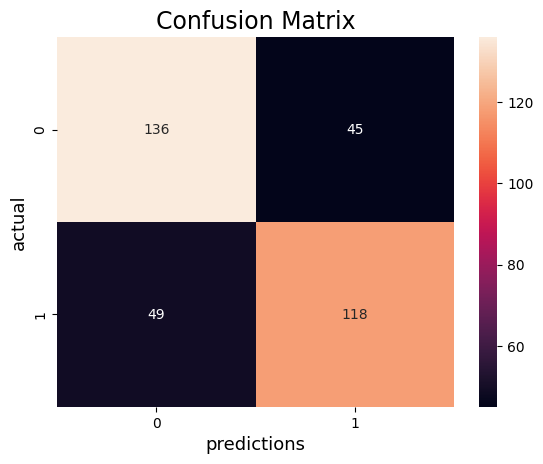

In [ ]:
predictions = dt.predict(X_test)
confusion = confusion_matrix(Y_test, predictions)
sns.heatmap(confusion, annot=True, fmt='g')
plt.ylabel('actual',fontsize=13)
plt.xlabel('predictions',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       181
           1       0.72      0.71      0.72       167

    accuracy                           0.73       348
   macro avg       0.73      0.73      0.73       348
weighted avg       0.73      0.73      0.73       348



SVM

In [ ]:
from sklearn.model_selection import cross_val_score
svm=clf = SVC(gamma="auto",kernel='linear',degree=3, C=1, random_state=99)
svm.fit(X_train,Y_train)
predictions = svm.predict(X_test)
accsvm=accuracy_score(Y_test, predictions)*100
print("Accuracy of Support Vector Machine (%): \n",accsvm)
#get FPR
recallsvm=recall_score(Y_test,predictions)*100
print("Recall of Support Vector Machine is: \n",recallsvm)
precsvm=precision_score(Y_test,predictions)*100
print("Precision of Support Vector Machine is: \n",precsvm)

Accuracy of Support Vector Machine (%): 
 61.7816091954023
Recall of Support Vector Machine is: 
 44.31137724550898
Precision of Support Vector Machine is: 
 64.91228070175438


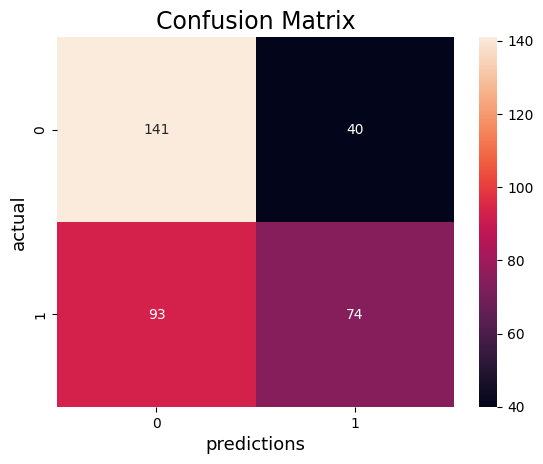

In [ ]:
predictions = svm.predict(X_test)
confusion = confusion_matrix(Y_test, predictions)
sns.heatmap(confusion, annot=True, fmt='g')
plt.ylabel('actual',fontsize=13)
plt.xlabel('predictions',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.78      0.68       181
           1       0.65      0.44      0.53       167

    accuracy                           0.62       348
   macro avg       0.63      0.61      0.60       348
weighted avg       0.62      0.62      0.61       348



RANDOM FOREST


In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
predictions = rf.predict(X_test)
accrf=accuracy_score(Y_test, predictions)*100
print("Accuracy of Random Forest (%): \n",accrf)
#get FPR
recallrf=recall_score(Y_test,predictions)*100
print("Recall of Random Forest is: \n",recallrf)
precrf=precision_score(Y_test,predictions)*100
print("Precision of Random Forest is: \n",precrf)

Accuracy of Random Forest (%): 
 81.03448275862068
Recall of Random Forest is: 
 75.44910179640718
Precision of Random Forest is: 
 83.44370860927152


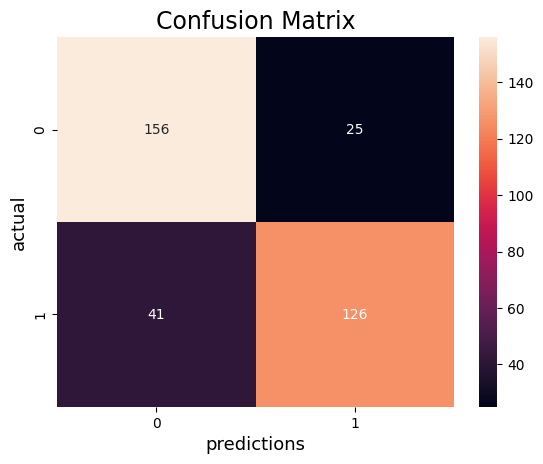

In [ ]:
predictions = rf.predict(X_test)
confusion = confusion_matrix(Y_test, predictions)
sns.heatmap(confusion, annot=True, fmt='g')
plt.ylabel('actual',fontsize=13)
plt.xlabel('predictions',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       181
           1       0.83      0.75      0.79       167

    accuracy                           0.81       348
   macro avg       0.81      0.81      0.81       348
weighted avg       0.81      0.81      0.81       348



NAIVE BAYES


In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)
predictions = naive_bayes.predict(X_test)
accnaive_bayes=accuracy_score(Y_test, predictions)*100
print("Accuracy of Naive Bayes (%): \n",accnaive_bayes)
#get FPR
recallnaive_bayes=recall_score(Y_test,predictions)*100
print("Recall of Naive Bayes is: \n",recallnaive_bayes)
precnaive_bayes=precision_score(Y_test,predictions)*100
print("Precision of Naive Bayes is: \n",precnaive_bayes)

Accuracy of Naive Bayes (%): 
 60.91954022988506
Recall of Naive Bayes is: 
 35.92814371257485
Precision of Naive Bayes is: 
 67.41573033707866


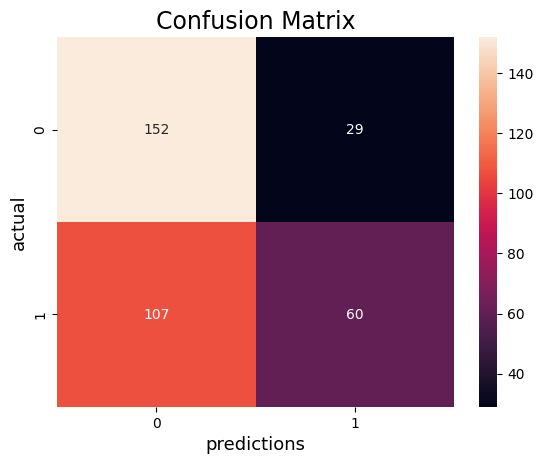

In [ ]:
predictions = naive_bayes.predict(X_test)
confusion = confusion_matrix(Y_test, predictions)
sns.heatmap(confusion, annot=True, fmt='g')
plt.ylabel('actual',fontsize=13)
plt.xlabel('predictions',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.59      0.84      0.69       181
           1       0.67      0.36      0.47       167

    accuracy                           0.61       348
   macro avg       0.63      0.60      0.58       348
weighted avg       0.63      0.61      0.58       348



### GRADIENT BOOSTING

In [ ]:
df

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,HALSTEAD_CONTENT,HALSTEAD_DIFFICULTY,...,HALSTEAD_LENGTH,HALSTEAD_LEVEL,HALSTEAD_PROG_TIME,HALSTEAD_VOLUME,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,Defective
0,9.0,11.0,0.0,0.0,6.0,5.0,5.0,29.0,26.93,18.90,...,95.0,0.05,534.42,508.97,36.0,59.0,20.0,21.0,41.0,1
1,0.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0,16.73,3.00,...,14.0,0.33,8.36,50.19,6.0,8.0,6.0,6.0,7.0,0
2,18.0,31.0,0.0,27.0,16.0,13.0,12.0,137.0,86.96,33.60,...,437.0,0.03,5454.40,2922.00,180.0,257.0,75.0,28.0,184.0,1
3,1.0,5.0,0.0,1.0,3.0,2.0,1.0,18.0,22.33,14.18,...,70.0,0.07,249.48,316.65,26.0,44.0,11.0,12.0,23.0,1
4,5.0,17.0,0.0,7.0,9.0,8.0,1.0,82.0,69.72,22.29,...,274.0,0.04,1924.82,1554.24,107.0,167.0,36.0,15.0,96.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,5.80,2.00,...,5.0,0.50,1.29,11.61,1.0,4.0,1.0,4.0,2.0,1
1179,2.0,13.0,0.0,0.0,7.0,6.0,3.0,32.0,26.84,13.43,...,75.0,0.07,269.08,360.55,31.0,44.0,15.0,13.0,36.0,1
1180,11.0,29.0,0.0,2.0,15.0,12.0,9.0,108.0,68.03,32.61,...,350.0,0.03,4021.00,2218.95,138.0,212.0,55.0,26.0,123.0,0
1181,0.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,7.24,2.50,...,7.0,0.40,2.51,18.09,1.0,6.0,1.0,5.0,4.0,0


In [ ]:
data = arff.loadarff('KC1.arff')
# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Inisialisasi model-model yang akan digabungkan
svm_model = SVC(probability=True)
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
nb_model = GaussianNB()

# Inisialisasi model ensemble dengan Gradient Boosting
ensemble_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Melatih model-model dasar
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Membuat prediksi dari model-model dasar
svm_pred = svm_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
nb_pred = nb_model.predict(X_test)

# Menggabungkan prediksi dari model-model dasar sebagai fitur untuk model ensemble
X_ensemble = np.column_stack((svm_pred, rf_pred, dt_pred, nb_pred))

# Melatih model ensemble
ensemble_model.fit(X_ensemble, y_test)

# Membuat prediksi menggunakan model ensemble
ensemble_pred = ensemble_model.predict(X_ensemble)


# Menampilkan laporan klasifikasi untuk model SVM
print("Classification Report of SVM Model:")
print(classification_report(y_test, svm_pred))

# Menampilkan laporan klasifikasi untuk model Random Forest
print("Classification Report of Random Forest Model:")
print(classification_report(y_test, rf_pred))

# Menampilkan laporan klasifikasi untuk model Decision Tree
print("Classification Report of Decision Tree Model:")
print(classification_report(y_test, dt_pred))

# Menampilkan laporan klasifikasi untuk model Naive Bayes
print("Classification Report of Naive Bayes Model:")
print(classification_report(y_test, nb_pred))

# Menghitung akurasi dari model ensemble
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)

# Mencetak akurasi model ensemble
print("Accuracy of Ensemble Model:", ensemble_accuracy)

Classification Report of SVM Model:
              precision    recall  f1-score   support

           0       0.60      0.84      0.70       171
           1       0.75      0.47      0.58       177

    accuracy                           0.65       348
   macro avg       0.68      0.65      0.64       348
weighted avg       0.68      0.65      0.64       348

Classification Report of Random Forest Model:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       171
           1       0.85      0.80      0.82       177

    accuracy                           0.82       348
   macro avg       0.83      0.83      0.82       348
weighted avg       0.83      0.82      0.82       348

Classification Report of Decision Tree Model:
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       171
           1       0.77      0.74      0.75       177

    accuracy                           0.75       348


HASIL SELURUH ALGORITMA MURNI

In [ ]:
algos=["Decision Tree", "Support Vector Machine","Random Forrest","Naive Bayes"]
acc=[accdt,accsvm,accrf,accnaive_bayes]
recall=[recalldt,recallsvm,recallrf,recallnaive_bayes]
prec=[precdt,precsvm,precrf,precnaive_bayes]
comp={"Algorithms":algos,"Accuracies":acc,"Recall":recall,"Precision":prec}
compdf=pd.DataFrame(comp)
display(compdf.sort_values(by=["Accuracies","Recall","Precision"], ascending=False))

,Algorithms,Accuracies,Recall,Precision
2,Random Forrest,81.034483,75.449102,83.443709
0,Decision Tree,72.988506,70.658683,72.392638
1,Support Vector Machine,61.781609,44.311377,64.912281
3,Naive Bayes,60.919540,35.928144,67.415730
